# Load

In [1]:
"""
Load dataset
"""
import pandas as pd
import numpy as np
path_to_file = "~/Desktop/new.KDD.train.csv"
data = pd.read_csv(path_to_file)
data = data.drop('Unnamed: 0',axis=1)
data.head(2)

,duration,aol,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome.response
0,0,0,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,0


# Split Prep

In [2]:
import sklearn.cross_validation as cv
X = data.iloc[:,0:-1]
y=data.iloc[:,-1]

x_train, x_test, y_train, y_test = cv.train_test_split(X, 
                                                       y, 
                                                       train_size=0.7, 
                                                       random_state=0)

In [3]:
import sklearn.metrics as met

def get_error(x_train, y_train, x_test, y_test, model, show = True):
    model.fit(x_train, y_train)
    train_error = 1 - model.score(x_train, y_train)
    test_error = 1 - model.score(x_test, y_test)
    #train_auc = met.roc_auc_score(x_train, y_train)
    #test_auc = met.roc_auc_score(x_test, y_test)
    if show:
        print "The training error is: %.5f" %train_error 
        print "The test     error is: %.5f" %test_error
        #print "The training auc is: %.5f" %train_auc
        #print "The test     auc is: %.5f" %test_auc
    return [train_error, test_error]

# SVM

In [4]:
import numpy as np
from sklearn import grid_search as gs
from sklearn import svm
#from sklearn import preprocessing

## CV using sklearn.svm.SVC
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [5]:
svc_model = svm.SVC(kernel='linear', cache_size=500, random_state=0)
grid_para_svc = {'C': np.logspace(-3, 3, 100)}
grid_search_svc = gs.GridSearchCV(svc_model, grid_para_svc)

In [ ]:
grid_search_svc.fit(x_train, y_train)

In [ ]:
print grid_search_svc.best_params_
scores = np.array([1- scores.mean_validation_score for scores in grid_search_svc.grid_scores_])

## CV using sklearn.svm.LinearSVC
http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [7]:
C = np.logspace(-3, 3, 300)
linearsvc_model = svm.LinearSVC(penalty='l1', dual=False, fit_intercept=True, random_state=0, max_iter=1000)
grid_para_linearsvc = {'C': np.logspace(-3, 3, 100)}
stratify_divide = cv.StratifiedKFold(y=y_train, n_folds=5, shuffle=True, random_state=0)
grid_search_linearsvc = gs.GridSearchCV(linearsvc_model, grid_para_linearsvc, cv=stratify_divide)

In [8]:
grid_search_linearsvc.fit(x_train, y_train)

GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 0 ..., 0 0], n_folds=5, shuffle=True, random_state=0),
       error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=0, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   1.14976e-03, ...,   8.69749e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [15]:
scores = np.array([1- scores.mean_validation_score for scores in grid_search_linearsvc.grid_scores_])
scores

array([ 0.0356426 ,  0.03512094,  0.03458795,  0.03153741,  0.03014255,
        0.02958687,  0.02918996,  0.02905388,  0.0291446 ,  0.02932605,
        0.02942811,  0.02954151,  0.02966625,  0.02953017,  0.02956419,
        0.02943945,  0.02911058,  0.0289745 ,  0.02879305,  0.02878171,
        0.02866831,  0.02872501,  0.02856624,  0.02854356,  0.0283848 ,
        0.02826006,  0.02814665,  0.02798789,  0.02793119,  0.02781778,
        0.02772706,  0.02763634,  0.02759098,  0.02748891,  0.02706932,
        0.02742087,  0.02765902,  0.02767036,  0.02772706,  0.02739819,
        0.02738685,  0.02722809,  0.02730747,  0.02738685,  0.02743221,
        0.02714871,  0.02718273,  0.02704664,  0.0270353 ,  0.0269219 ,
        0.0270353 ,  0.02701262,  0.02708066,  0.02694458,  0.02678582,
        0.02693324,  0.02684252,  0.02684252,  0.02681984,  0.02683118,
        0.02700128,  0.02698994,  0.0269786 ,  0.0268652 ,  0.02698994,
        0.02706932,  0.02696726,  0.02704664,  0.0269786 ,  0.02

In [11]:
grid_search_linearsvc.best_estimator_

LinearSVC(C=1.873817422860385, class_weight=None, dual=False,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l1', random_state=0,
     tol=0.0001, verbose=0)

In [12]:
grid_search_linearsvc.best_score_

0.97321418446150532

In [13]:
grid_search_linearsvc.best_params_

{'C': 1.873817422860385}

In [17]:
grid_search_linearsvc.best_estimator_.C

1.873817422860385

In [19]:
grid_search_linearsvc.best_estimator_.coef_

array([[ -8.02805070e-06,   0.00000000e+00,  -4.01836430e-01,
          6.76636374e-01,   5.54395119e-01,   1.47126543e+00,
          1.47780590e+00,   1.10680053e+00,   2.95672506e-01,
         -4.38045496e-01,  -3.58412090e-01,   9.02825150e-01,
          3.12770199e-01,   4.65575885e-01,   5.95259904e-01,
          6.10206014e-01,  -4.12239107e-01,  -4.81409201e-01,
         -4.70756655e-01,   1.39368256e+00,   0.00000000e+00,
          1.40694898e+00,  -1.67536920e-01,   0.00000000e+00,
          7.36000749e-01,   0.00000000e+00,   7.65730844e-01,
         -2.86252127e+00,   1.42327224e+00,   5.17102158e-01,
          5.05371032e-01,   1.32944848e+00,   1.15043750e+00,
          3.91914318e-01,   1.41718995e+00,   1.56331652e+00,
          3.57613417e-01,   7.13929254e-01,   7.02253584e-01,
          1.27332001e+00,   6.22312291e-01,   1.57451336e+00,
         -9.42898932e-01,  -5.59531678e-01,   1.49794266e+00,
          1.11036716e+00,  -9.69186152e-01,   5.58535569e-01,
        

## Plot

Populating the interactive namespace from numpy and matplotlib


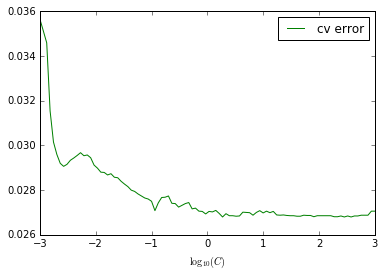

In [32]:
%pylab inline
import matplotlib.pyplot as pl
#pl.plot(np.log10(C), svm_train, c = 'blue', label='training error')
#pl.plot(np.log10(C), svm_test, c = 'red', label='test error')
pl.plot(np.log10(C), scores, c='green', label='cv error')
pl.legend()
pl.xlabel('$\log_{10}(C)$')
pl.show()

In [33]:
log(1.87)

0.62593843086649537